In [1]:
#Libraries
import numpy as np
from numpy import *
import pandas as pd
from PIL import Image
import cv2 as cv2
import os
import matplotlib.pyplot as plt
import sys

In [2]:
#Face Data to 1D Vectors and then to a data matrix of size [Ntrain, D] , where D is of size [256x256] 
def load_images_from_folder(folder):
    data1d = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            arr = array(Image.fromarray(img).convert('L'))
            arr1 = arr.flatten()
            data1d.append(arr1)
            data = np.array(data1d)
    return data

In [3]:
#Plotting one Image by its ImageVector
def showImage(imageVector):
    data = np.array(imageVector)
    data2d = data.reshape(-1,256)
    img = Image.fromarray(data2d)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [4]:
# Visualization
def plot_gallery(images, rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1 )
        plt.imshow(images[i].reshape((-1,256)), cmap=plt.cm.gray)

In [5]:
# Visualization
def plot_gallery(images, rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1 )
        plt.imshow(images[i].reshape((-1,256)), cmap=plt.cm.gray)

In [6]:
def reconstructing_faces(k,meanImg,testing,V):
    weights=np.dot(testing, V.T)
    reconstruction = meanImg + np.dot(weights[:,0:k], V[0:k,:])
    return reconstruction

In [8]:
def reconstruction_error(testing , reconstructed):
    final = 0
    for i in range(0,20):
        result = np.linalg.norm(testing[i]) - np.linalg.norm(reconstructed[i])
        final = final + (result**2)/177
    return final

In [9]:
#Loading Images from Faces Folder
folder = "/Users/vedadnya_98/Desktop/ML in Python/Refactored_Py_DS_ML_Bootcamp-master/ML Homework/face_data"
faces = load_images_from_folder(folder)
print("Face Data Dimensions :",faces.shape)
print("Data : \n" , faces)

Face Data Dimensions : (177, 65536)
Data : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
#Training & Tesing Split
training, testing = faces[:157],faces[157:]
check = np.copy(testing)
print("Training Size:",training.shape)
print("Testing Size:",testing.shape)
print("\nTraining Set:")
print(training)
print("\nTesting Set:")
print(testing)

Training Size: (157, 65536)
Testing Size: (20, 65536)

Training Set:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Testing Set:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


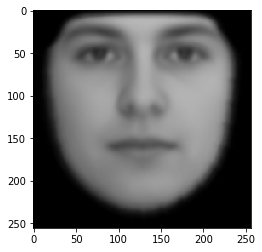

In [11]:
#Subracting Mean Image from Training Dataset
transpose = training.T
sumTuple = transpose.sum(axis=1)
N = 157
meanImg = [x / N for x in sumTuple]
training = training - meanImg
showImage(meanImg)

In [12]:
U, s, V = np.linalg.svd(training, full_matrices=False)
eigen_faces=[]
for x in range(V.shape[0]):
    fig=np.reshape(V[x],(-1,256))
    eigen_faces.append(fig)   

In [13]:
#K=30 Eigen Faces
k = 30
rowIndex =156
kval = k - 1
new = []
eigenfaces = np.array(eigen_faces)
for i in eigenfaces:
    arr = i.flatten()
    new.append(arr)
    new_faces = np.array(new)
print(new_faces.shape)       
while(rowIndex>kval):
    new_faces = np.delete(new_faces, rowIndex , 0)
    rowIndex = rowIndex - 1
print(new_faces.shape)        

(157, 65536)
(30, 65536)


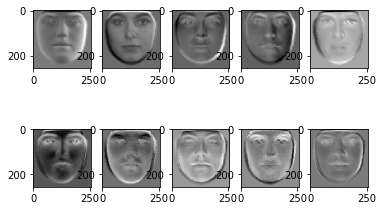

In [14]:
#First 10 EigenFaces
plot_gallery(new_faces, 2, 5)

RECONSTRUCTING FACES FOR K=30


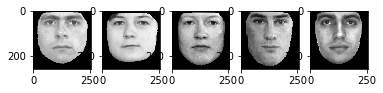

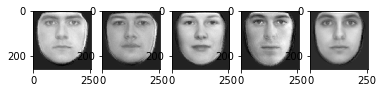

In [15]:
testing = testing - meanImg
k=30
print("RECONSTRUCTING FACES FOR K=30")
reconstructed30 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed30, 1, 5)

RECONSTRUCTING FACES FOR K=10


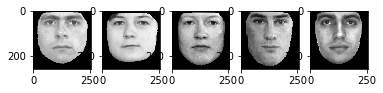

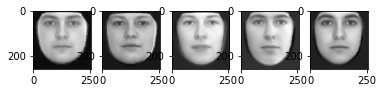

In [16]:
k=10
print("RECONSTRUCTING FACES FOR K=10")
reconstructed10 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed10, 1, 5)

RECONSTRUCTING FACES FOR K=50


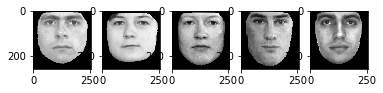

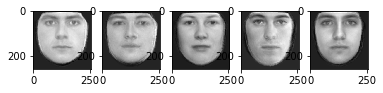

In [17]:
k=50
print("RECONSTRUCTING FACES FOR K=50")
reconstructed50 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed50, 1, 5)

RECONSTRUCTING FACES FOR K=100


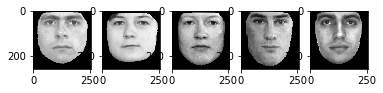

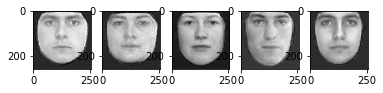

In [18]:
k=100
print("RECONSTRUCTING FACES FOR K=100")
reconstructed100 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed100, 1, 5)

RECONSTRUCTING FACES FOR K=150


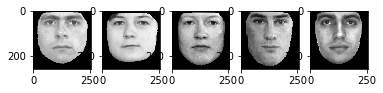

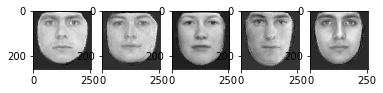

In [19]:
k=150
print("RECONSTRUCTING FACES FOR K=150")
reconstructed150 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed150, 1, 5)

RECONSTRUCTING FACES FOR K=156


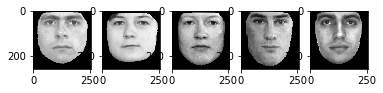

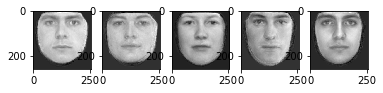

In [20]:
k=156
print("RECONSTRUCTING FACES FOR K=156")
reconstructed156 = reconstructing_faces(k,meanImg,testing,V)
# Visualization of Original Faces
plot_gallery(check, 1, 5)
plot_gallery(reconstructed156, 1, 5)

In [21]:
error10 = reconstruction_error(check , reconstructed10)
print(error10)
error30 = reconstruction_error(check , reconstructed30)
print(error30)
error50 = reconstruction_error(check , reconstructed50)
print(error50)
error100 = reconstruction_error(check , reconstructed100)
print(error100)
error150 = reconstruction_error(check , reconstructed150)
print(error150)

29020.27206873319
14730.254260504043
12458.273194962068
9680.184625234077
7952.231580077256


In [23]:
errors = []
for i in range(0,156):
    faces = reconstructing_faces(i,meanImg,testing,V)
    error = reconstruction_error(check , faces)
    errors.append(error)
print(errors)

[187798.4717680546, 142490.25126089182, 73973.97846673866, 63799.02628877675, 52846.01145582856, 49233.18080698677, 36302.74566962041, 33790.70222816778, 32037.500982078425, 29888.66830229111, 29020.27206873319, 27382.053645778178, 26578.02011174174, 24985.01360843145, 24236.313655856455, 22985.881711363112, 22092.233884611276, 20547.662113293358, 20380.005497952196, 18969.59307434361, 18002.78675288849, 15478.511289159083, 15140.934191755317, 15219.245855764959, 15216.719658598868, 15433.933300075623, 15294.716934003633, 15180.998254990482, 15129.538419508852, 15138.219318673135, 14730.254260504043, 14524.673246054392, 14454.156763722285, 13933.737702928564, 13772.533505712525, 13682.20736866018, 13626.051827599802, 13659.833764205216, 13848.232450268264, 13707.611423290116, 13346.400473104886, 13307.517104738683, 12972.144733538462, 12759.98895203344, 12872.2140466304, 13226.575303344029, 13160.617845795881, 12920.629115475074, 12967.392542482492, 12427.008287459787, 12458.2731949620

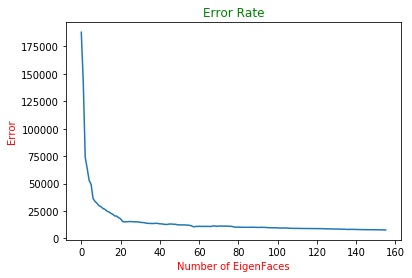

In [24]:
plt.plot(np.arange(k),errors)
plt.xlabel('Number of EigenFaces',color='red')
plt.ylabel('Error',color='red')
plt.title('Error Rate',color='green')
plt.show()